# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = ""
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):
    
    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")

    # Try these things
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()

        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]

    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
# Drop the rows that have been added with no data or partial data
cleanWeather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | qaanaaq
Processing record 1 | cubarral
City not found. Skipping...
Processing record 2 | burnie
Processing record 3 | castro
Processing record 4 | busselton
Processing record 5 | daru
Processing record 6 | albany
Processing record 7 | jamestown
Processing record 8 | yellowknife
Processing record 9 | brasileia
City not found. Skipping...
Processing record 10 | noumea
Processing record 11 | grand gaube
Processing record 12 | gerash
Processing record 13 | bethel
Processing record 14 | pisco
Processing record 15 | kavieng
Processing record 16 | cape town
Processing record 17 | punta arenas
Processing record 18 | iqaluit
Processing record 19 | bathsheba
Processing record 20 | atuona
Processing record 21 | yulara
Processing record 22 | bluff
Processing record 23 | alofi
Processing record 24 | galle
Processing record 25 | lebu
Processing record 26 | puerto ayora
Processing record 27 | hithadhoo
Processing record 28

Processing record 228 | ryotsu
Processing record 229 | vao
Processing record 230 | pomabamba
Processing record 231 | new norfolk
Processing record 232 | xadani
City not found. Skipping...
Processing record 233 | rafai
Processing record 234 | yamnytsya
Processing record 235 | hualmay
Processing record 236 | kayes
Processing record 237 | lincoln
Processing record 238 | bandarbeyla
Processing record 239 | saeby
Processing record 240 | krasnoselkup
City not found. Skipping...
Processing record 241 | tungkang
City not found. Skipping...
Processing record 242 | usakos
Processing record 243 | tawkar
City not found. Skipping...
Processing record 244 | farah
Processing record 245 | zabol
Processing record 246 | ashtian
Processing record 247 | san lorenzo
Processing record 248 | onguday
Processing record 249 | jiaonan
Processing record 250 | nelson bay
Processing record 251 | kella
Processing record 252 | jizan
Processing record 253 | barentsburg
City not found. Skipping...
Processing record 254

Processing record 452 | araouane
Processing record 453 | vanavara
Processing record 454 | mantua
Processing record 455 | guerrero negro
Processing record 456 | macas
Processing record 457 | sobolevo
Processing record 458 | umea
Processing record 459 | digapahandi
Processing record 460 | vaitupu
City not found. Skipping...
Processing record 461 | pavilosta
Processing record 462 | romny
Processing record 463 | athens
Processing record 464 | maniitsoq
Processing record 465 | palmer
Processing record 466 | fengzhen
Processing record 467 | altamira
Processing record 468 | umm kaddadah
Processing record 469 | machico
Processing record 470 | tazovskiy
Processing record 471 | bud
Processing record 472 | akaltara
Processing record 473 | te anau
Processing record 474 | xining
Processing record 475 | batagay-alyta
Processing record 476 | airai
Processing record 477 | belaya gora
Processing record 478 | yarada
Processing record 479 | crateus
Processing record 480 | vila velha
Processing record 481

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cleanWeather.to_csv(output_data_file)
# Display counts of each column
cleanWeather.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [6]:
#Display the final dataframe
cleanWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,100,GL,1575143426,93,77.48,-69.36,9.84,9.35
2,Burnie,100,AU,1575143426,79,-41.05,145.91,48.99,1.99
3,Castro,75,CL,1575143426,76,-42.48,-73.76,55.4,6.93
4,Busselton,0,AU,1575143173,45,-33.64,115.35,55,12.46
5,Daru,97,PG,1575143426,87,-9.07,143.21,78.33,4.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

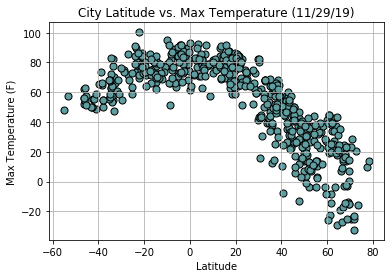

In [7]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="cadetblue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature (11/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVtemp.png")

#### Latitude vs. Humidity Plot

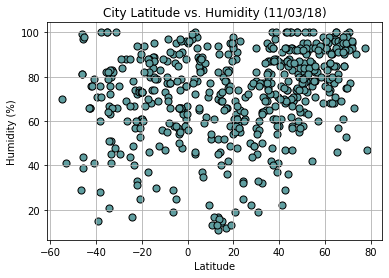

In [8]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"],color="cadetblue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVhum.png")

#### Latitude vs. Cloudiness Plot

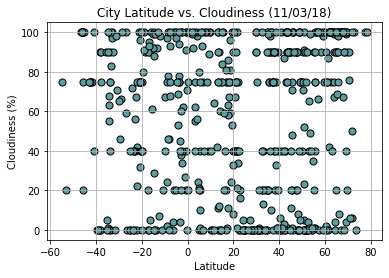

In [9]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="cadetblue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVcloud.png")

#### Latitude vs. Wind Speed Plot

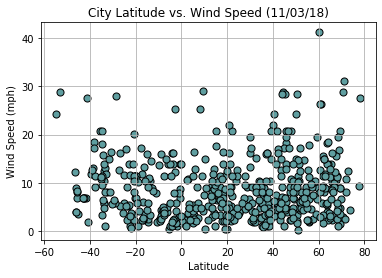

In [10]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="cadetblue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()